# Stocks Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime 
from sklearn.linear_model import LinearRegression

In [119]:
stocks = ['AAPL', 'FB', 'NFLX', 'AMZN', 'GOOG']
indices = ['DJI', 'GSPC']
diffCols = ['Close', 'Volume']

# Adds a column to df for the day by day change of col
def add_day_change(df, cols):
    for col in cols:
        try:
            df[col + '_Diff'] = pd.to_numeric(df[col]).pct_change()
        except:
            print(f"Unable to calculate diff for {col}")
          

def add_moving_avg(df, col, n):
    try:
        df[f"Moving_Avg_{col}_{n}"] = df[col].rolling(window=n).mean().shift(1)
    except:
        print(f"Unable to calculate moving avg for {col}")

# Market dfs will store all of our dataframes for stock market data
market_dfs = {}
for symbol in stocks + indices:
    market_dfs[symbol] = pd.read_csv(symbol + '.csv')
    add_moving_avg(market_dfs[symbol], "Close", 5)
    add_moving_avg(market_dfs[symbol], "Close", 1)
    add_day_change(market_dfs[symbol], diffCols)
    market_dfs[symbol].dropna(inplace=True)

In [120]:
market_dfs["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg_Close_5,Moving_Avg_Close_1,Close_Diff,Volume_Diff
5,2017-01-10,118.769997,119.379997,118.300003,119.110001,114.123047,24462100,117.136000,118.989998,0.001009,-0.271135
6,2017-01-11,118.739998,119.930000,118.599998,119.750000,114.736275,27588600,117.728000,119.110001,0.005373,0.127810
7,2017-01-12,118.900002,119.300003,118.209999,119.250000,114.257195,27086200,118.474001,119.750000,-0.004175,-0.018210
8,2017-01-13,119.110001,119.620003,118.809998,119.040001,114.055984,26111900,119.002001,119.250000,-0.001761,-0.035970
9,2017-01-17,118.339996,120.239998,118.220001,120.000000,114.975792,34439800,119.228000,119.040001,0.008065,0.318931
10,2017-01-18,120.000000,120.500000,119.709999,119.989998,114.966225,23713000,119.430000,120.000000,-0.000083,-0.311465
11,2017-01-19,119.400002,120.089996,119.370003,119.779999,114.765007,25597300,119.606000,119.989998,-0.001750,0.079463
12,2017-01-20,120.449997,120.449997,119.730003,120.000000,114.975792,32597900,119.612000,119.779999,0.001837,0.273490
13,2017-01-23,120.000000,120.809998,119.769997,120.080002,115.052444,22050200,119.762000,120.000000,0.000667,-0.323570
14,2017-01-24,119.550003,120.099998,119.500000,119.970001,114.947060,23211000,119.970000,120.080002,-0.000916,0.052644


In [3]:
# Plots a trend for a symbol in the dfs dictionary for the col specified. Standardized divides all data by the mean
def plot_trend(symbols, dfs, col, standardize=False):
    # Figsize
    plt.figure(figsize=(10,6))
    
    # Plot each stock's price
    for symbol in symbols: 
        trend = dfs[symbol][col] / np.mean(dfs[symbol][col]) if standardize else dfs[symbol][col]
        plt.plot(trend)
        date = dfs[symbol].Date
        
    # Plot config
    locs, _ = plt.xticks()
    plt.xticks(locs[1:-1], date[0:-1:len(date)//(len(locs)-3)])
    plt.gca().legend(symbols)
    plt.title(f"Standardized {col} over Time" if standardize else f"{col} over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()

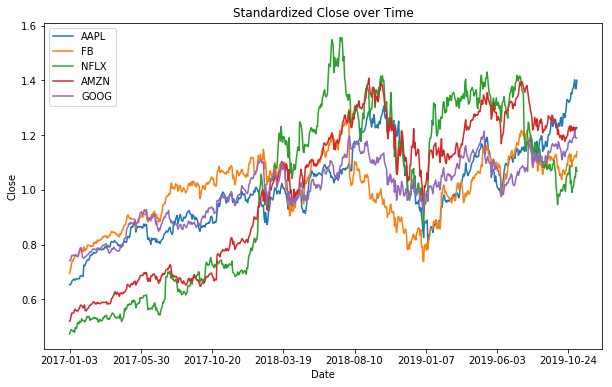

In [4]:
plot_trend(stocks, market_dfs, "Close", standardize=True)

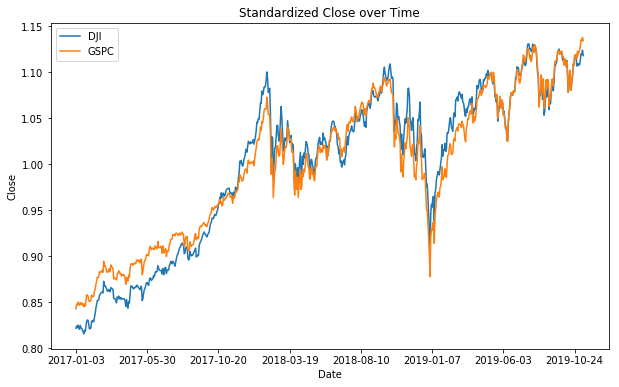

In [5]:
plot_trend(indices, market_dfs, "Close", standardize=True)

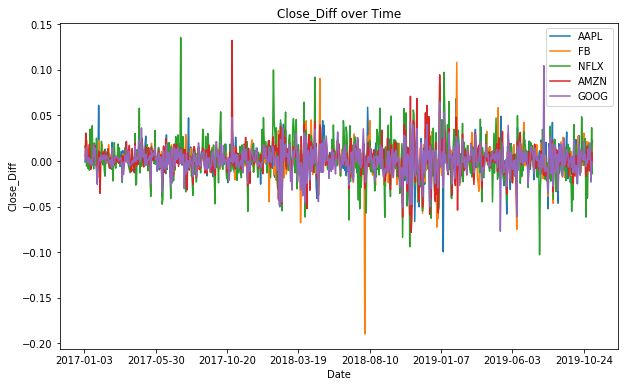

In [6]:
plot_trend(stocks, market_dfs, "Close_Diff")

In [7]:
len(market_dfs["FB"])

713

# News Data

In [8]:
news_df = pd.read_csv('nytimes_2015_2019.csv')

In [9]:
news_df.head()

,web_url,snippet,lead_paragraph,abstract,print_page,source,headline,headline_kicker,headline_content_kicker,headline_print_headline,...,headline_seo,headline_sub,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,word_count
0,https://www.nytimes.com/2015/01/08/world/ameri...,"Born through a mix of frustration, satire and ...","MONTERREY, Mexico — Inside a large, open-air b...","Born through a mix of frustration, satire and ...",9.0,The New York Times,A Bus Takes a Local Route to Fighting Mexican ...,Monterrey Journal,NaN,A Bus Takes a Local Route to Fighting Mexican ...,...,NaN,NaN,"[{'name': 'persons', 'value': 'Villegas, Pauli...",2015-01-08T00:45:08+0000,article,Foreign,World,"{'original': 'By Paulina Villegas', 'person': ...",News,1030
1,https://www.nytimes.com/2015/01/11/business/mu...,So-called dark trading — when computers serve ...,"JUDGING solely by the name, stock trading in s...",So-called dark trading — when computers serve ...,29.0,The New York Times,The Rise of Trading in the Dark,Datapoints,NaN,The Rise of Trading in the Dark,...,NaN,NaN,"[{'name': 'subject', 'value': 'Stocks and Bond...",2015-01-09T21:44:42+0000,article,SundayBusiness,Business Day,"{'original': 'By Anna Bernasek', 'person': [{'...",News,366
2,https://www.nytimes.com/2015/01/11/business/fo...,"In the fixed-income market, 2014 was frustrati...",BONDS confounded conventional wisdom in 2014 w...,"In the fixed-income market, 2014 was frustrati...",16.0,The New York Times,"For Bond Investors, That Other Shoe Still Didn...",NaN,NaN,"For Bond Investors, the Other Shoe Still Didn’...",...,NaN,NaN,"[{'name': 'subject', 'value': 'Stocks and Bond...",2015-01-09T21:46:05+0000,article,NODESK,Business Day,"{'original': 'By Carla Fried', 'person': [{'fi...",News,1269
3,https://www.nytimes.com/2015/01/11/business/pe...,A Canadian investor takes a chance on a pace-s...,The typical origin story for a tech company in...,A Canadian investor takes a chance on a pace-s...,1.0,The New York Times,The Uphill Push to Save a Bike-Share Pioneer,NaN,NaN,The Uphill Push to Save a Bike-Share Pioneer,...,NaN,NaN,"[{'name': 'subject', 'value': 'Bicycles and Bi...",2015-01-09T21:03:51+0000,article,SundayBusiness,Business Day,"{'original': 'By Ian Austen', 'person': [{'fir...",News,1923
4,https://www.nytimes.com/2015/01/06/business/in...,"The euro's continued plunge, to a nine-year lo...",FRANKFURT — The value of the euro fell to its ...,"The euro's continued plunge, to a nine-year lo...",5.0,The New York Times,Falling Euro Fans Fears of a Regional Slowdown,NaN,NaN,Sliding Euro Fans Fears of a Slowdown,...,NaN,NaN,"[{'name': 'persons', 'value': 'Ewing, Jack', '...",2015-01-05T21:05:04+0000,article,Business,Business Day,"{'original': 'By Jack Ewing', 'person': [{'fir...",News,1157


In [10]:
# drop duplicates
print(len(news_df))
news_df = news_df.drop_duplicates()
print(len(news_df))

61844
45447


In [11]:
news_df.columns

Index(['web_url', 'snippet', 'lead_paragraph', 'abstract', 'print_page',
       'source', 'headline', 'headline_kicker', 'headline_content_kicker',
       'headline_print_headline', 'headline_name', 'headline_seo',
       'headline_sub', 'keywords', 'pub_date', 'document_type', 'news_desk',
       'section_name', 'byline', 'type_of_material', 'word_count'],
      dtype='object')

### Delete Columns with Missing Data

In [12]:
# percentage of each column that's missing
news_df.isna().sum() / len(news_df)

web_url                    0.000044
snippet                    0.000286
lead_paragraph             0.001276
abstract                   0.000242
print_page                 0.362180
source                     0.003477
headline                   0.000000
headline_kicker            0.823861
headline_content_kicker    1.000000
headline_print_headline    0.304597
headline_name              1.000000
headline_seo               1.000000
headline_sub               1.000000
keywords                   0.000000
pub_date                   0.000000
document_type              0.000000
news_desk                  0.039695
section_name               0.000000
byline                     0.000000
type_of_material           0.008669
word_count                 0.000000
dtype: float64

### Delete Irrelevant Columns

In [13]:
news_df = news_df.drop(['web_url', 'byline', 'headline_print_headline', 'document_type'], axis=1)

In [14]:
# these are missing more than abstract and contain similar info
news_df = news_df.drop(['snippet', 'lead_paragraph'], axis=1)

# all missing data
news_df = news_df.drop(['headline_content_kicker', 'headline_name', 'headline_seo', 'headline_sub'], axis=1)

### Transform Columns to be More Useful

In [15]:
# make headline include kicker
news_df['full_headline'] = news_df[['headline', 'headline_kicker']].apply(lambda x: x.str.cat(sep=': '), axis=1)

del news_df['headline_kicker']
del news_df['headline']

In [16]:
# create whether or not the article was in print
news_df['is_print'] = news_df['print_page'].isna()
del news_df['print_page']

### Change to One-Hot Encoding

In [17]:
# from type of material
type_dummies = pd.get_dummies(news_df['type_of_material'].fillna('Other'), prefix='Type')
news_df = pd.concat([news_df, type_dummies], axis=1, join='inner')
news_df.rename(columns={'Type_briefing': 'Type_Briefing'}, inplace=True)

del news_df['type_of_material']

In [18]:
# from source
source_dummies = pd.get_dummies(news_df['source'].fillna('Other'), prefix='Source')
news_df = pd.concat([news_df, source_dummies], axis=1, join='inner')

del news_df['source']

In [19]:
# from news desk
news_desk_dummies = pd.get_dummies(news_df['news_desk'].fillna('Other'), prefix='Desk')
news_df = pd.concat([news_df, news_desk_dummies], axis=1, join='inner')

del news_df['news_desk']

In [20]:
# from section name
section_name_dummies = pd.get_dummies(news_df['section_name'], prefix='Section')
news_df = pd.concat([news_df, section_name_dummies], axis=1, join='inner')

del news_df['section_name']

### Change Keywords to Many-Hot Encoding

In [21]:
import ast
from collections import Counter

counter = Counter()

# Get list of all keywords
def get_most_common(x):
    keywords = set()
    for word in ast.literal_eval(x):
        keywords.add(word['value'])
    counter.update(keywords)
    return keywords

news_df['keywords'] = news_df['keywords'].apply(get_most_common)

# Pick top 100
most_common = set()
for word, counts in counter.most_common(100):
    most_common.add(word)

# Get the intersection of article's keywords and top 100
def get_keywords(x):
    keywords = x.intersection(most_common)
    return '|'.join(keywords)

# Many-hot
keywords_dummies = news_df['keywords'].apply(get_keywords).str.get_dummies()
keywords_dummies.rename(columns={x: 'Keyword_' + x for x in keywords_dummies.columns}, inplace=True)
news_df = pd.concat([news_df, keywords_dummies], axis=1, join='inner')

del news_df['keywords']

### Time

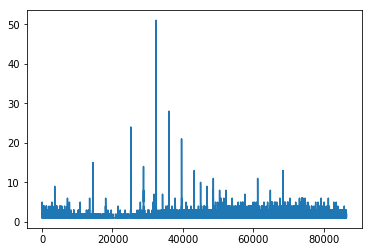

In [22]:
import dateutil.parser

news_df['time'] = news_df['pub_date'].apply(dateutil.parser.parse).apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)
x = pd.Series(news_df['time']).value_counts().sort_index()
plt.plot(x.index, x.values)

### Sentiment Analysis

In [23]:
# Adds sentiment by TextBlob (polarity and subjectivity) to a df based on its col column
def add_sentiment(df, col):
    def polarity_and_subjectivity(x):
        sentiment = TextBlob(str(x)).sentiment
        return sentiment.polarity, sentiment.subjectivity
    df['polarity'], df['subjectivity'] = zip(*df[col].map(polarity_and_subjectivity))

add_sentiment(news_df, 'abstract')

In [24]:
news_df['date'] = news_df['pub_date'].apply(lambda x: x.strip()[:10])

### Final Columns

In [25]:
news_df.columns

Index(['abstract', 'pub_date', 'word_count', 'full_headline', 'is_print',
       'Type_An Analysis', 'Type_An Appraisal', 'Type_Audio Podcast',
       'Type_Biography', 'Type_Brief',
       ...
       'Keyword_United States International Relations',
       'Keyword_United States Politics and Government',
       'Keyword_War Crimes, Genocide and Crimes Against Humanity',
       'Keyword_Women and Girls', 'Keyword_World War II (1939-45)',
       'Keyword_Xi Jinping', 'time', 'polarity', 'subjectivity', 'date'],
      dtype='object', length=183)

In [26]:
news_df.head()

,abstract,pub_date,word_count,full_headline,is_print,Type_An Analysis,Type_An Appraisal,Type_Audio Podcast,Type_Biography,Type_Brief,...,Keyword_United States International Relations,Keyword_United States Politics and Government,"Keyword_War Crimes, Genocide and Crimes Against Humanity",Keyword_Women and Girls,Keyword_World War II (1939-45),Keyword_Xi Jinping,time,polarity,subjectivity,date
0,"Born through a mix of frustration, satire and ...",2015-01-08T00:45:08+0000,1030,A Bus Takes a Local Route to Fighting Mexican ...,False,0,0,0,0,0,...,0,0,0,0,0,0,2708,0.166667,0.433333,2015-01-08
1,So-called dark trading — when computers serve ...,2015-01-09T21:44:42+0000,366,The Rise of Trading in the Dark: Datapoints,False,0,0,0,0,0,...,0,0,0,0,0,0,78282,-0.105556,0.188889,2015-01-09
2,"In the fixed-income market, 2014 was frustrati...",2015-01-09T21:46:05+0000,1269,"For Bond Investors, That Other Shoe Still Didn...",False,0,0,0,0,0,...,0,0,0,0,0,0,78365,-0.200000,0.950000,2015-01-09
3,A Canadian investor takes a chance on a pace-s...,2015-01-09T21:03:51+0000,1923,The Uphill Push to Save a Bike-Share Pioneer,False,0,0,0,0,0,...,0,0,0,0,0,0,75831,0.000000,0.000000,2015-01-09
4,"The euro's continued plunge, to a nine-year lo...",2015-01-05T21:05:04+0000,1157,Falling Euro Fans Fears of a Regional Slowdown,False,0,0,0,0,0,...,0,0,0,0,0,0,75904,0.000000,0.141667,2015-01-05


## News Sentiment by Day

In [27]:
news_by_date = {"date": news_df.date.unique(),"subjectivity": [], "polarity": []}
for date in news_df.date.unique():
    news_by_date["subjectivity"].append(np.mean(news_df.loc[news_df['date'] == date]['subjectivity']))
    news_by_date["polarity"].append(np.mean(news_df.loc[news_df['date'] == date]['polarity']))
avg_sentiment_df = pd.DataFrame(news_by_date).sort_values(by="date")
add_day_change(avg_sentiment_df, ["subjectivity","polarity"])

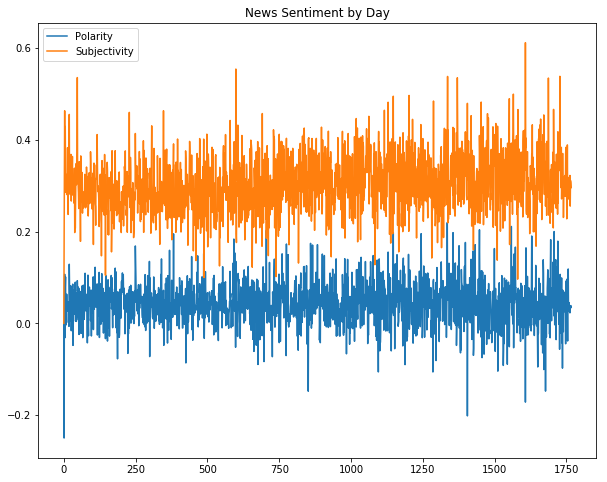

In [28]:
fig = plt.figure(figsize=(10,8))

plt.plot(list(range(len(avg_sentiment_df))), avg_sentiment_df['polarity'])
plt.plot(list(range(len(avg_sentiment_df))), avg_sentiment_df['subjectivity'])
plt.title('News Sentiment by Day')
plt.legend(['Polarity', 'Subjectivity'])

plt.show()

In [29]:
len(avg_sentiment_df)

1767

## Classifier

In [30]:
gspc = market_dfs['GSPC'][['Date']]
gspc['close'] = market_dfs['GSPC']['Close_Diff'] > 0

data = pd.merge(news_df.groupby('date').mean().reset_index(), gspc, how='inner', 
                left_on=['date'], right_on=['Date'])
data.dropna(subset=['close'], inplace=True)
X = data.drop(['Date', 'date', 'time', 'close'], axis=1)
Y = data['close']

/Users/adamskrocki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
print(classifier.score(X_test, Y_test))

0.4755244755244755


## Regression

In [32]:
data = pd.merge(news_df.groupby('date').mean().reset_index(), market_dfs['GSPC'], how='inner', 
                left_on=['date'], right_on=['Date'])
data.dropna(subset=['Close_Diff'], inplace=True)
X = data.drop(['date', 'time', 'polarity', 'subjectivity', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 
               'Volume', 'Close_Diff', 'Volume_Diff'], axis=1)
Y = data['Close_Diff']

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

-0.7208946228644288


Text(0,0.5,'Predictions')

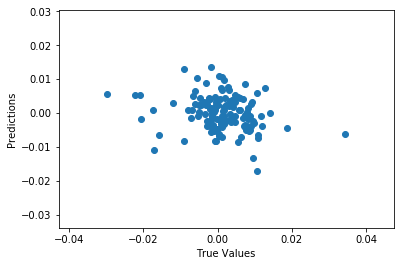

In [34]:
plt.scatter(Y_test, model.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Midterm Report

### Problem Statement
Can using relevant news articles make a significant addition to stock price prediction models?

### Dataset

Our dataset consists of news articles from the NY Times, stock data from Facebook, Netflix, Amazon, Google, and Apple, and stock index data for the Dow Jones Industrial Average and the S&P 500. All of our data ranges over the span of nearly three years, from January 1, 2017 to October 31, 2019, although our stock and index data does not include weekends or holidays, as the markets are closed on these days.

#### NY Times Articles
Our article data came from the NY Times Article Search API. For each day, we collected all news produced in the "Business Day", "U.S.", and "World" sections. So far, we have collected 51,253
news pieces from 2015 - 2019. We will continue to collect more years, but we are rate limited by the API. 

Surprisingly, this also included some articles from other sources such as the AP and Reuters. The news came in the form of articles, multimedia, and audio. However, we will just be using the metadata. It's impossible to determine if we are missing articles, but there were some columns that were missing values. Some of the missing data had reasonable interpretations such as an article not having a subtitle or otherwise could be placed in an "Other" category. 

For our primary data cleaning, we removed columns that weren't relevant or had a very large proportion of missing data. Additionally, we used one-hot encoding for several text columns (such as section, source, material type, and news desk) to make them more useful. This will also help us determine if we should filter the articles by the above categories later in the project. The API also provided keywords, from which we picked the 100 most common across all articles to encode as many-hot. 

##### Sentiment Analysis

The metadata also included larger text blocks such as headlines and abstracts. Our first attempt at using this data was performing sentiment analysis. We used a library that gave a polarity and subjectivity score. As you can see in the graph on the left, the average sentiment does vary by day. We are also considering training our own sentiment analysis model that will be able to better learn how to read headlines and abstracts that may be more sensationalized than typical text. 

Each day has a varying number of articles (roughly 18 - 37). We have tried different methods of condensing the articles to features, such as taking the sum or mean across each day. We have also considered trying to pick the day's "top" news or looking at articles one by one. There are 1,765 days covered by these news articles. With the different encodings, we currently have 186 features.

#### Stock and Index Data
Our stock and index data is in the following format:

For each date, we have the open, close, high, low, and adjusted close prices, as well as the volume. For any of these columns, we can calculate the percent difference between the previous date and the current date to indicate whether a feature increased or decreased and by how much since the past day. For example, we computed Close_Diff, the percent difference between the closing price on the current date and the closing price on the previous date. This can be useful as a target variable rather than directly using price since it takes into account that changes in price are more or less significant depending on what the current price is. 

In all of our stock and index datasets, there are 713 dates present. We will continue to add to this as we get news data for more years. The only missing data are the days for which the markets were closed (weekends and holidays). 

Here is a visualization of our stock data, with each stock’s prices scaled by its mean. 


### Modeling
For our modeling, we plan to compare baseline models that do not incorporate news data with more advanced models that do incorporate news data. For training, validation, and testing purposes, our dataset can be split by taking the most recent 20% as testing and the least recent 70% as training, with the rest as validation. 

#### Baseline
We plan on using models that are trained without news data as our baseline models. If we can see a significant improvement after modeling with the news data as a feature, then we will have good evidence that news data can be used as a supplemental data source to usefully improve stock price prediction. 

Some simple methods we can use to produce baseline predictions include:
    - Predicting the previous day's price as the current day's price (last value prediction)
    - Using a moving average of prices for the past n days to predict the current day's price
    - Using a time series based linear regression without news data and with the previous n days as features

#### Advanced 
We plan on testing out several additional models that incorporate news data to compare to our baseline models. Besides working with more complex models, we will also be creating features that could be useful to these models. These features include:
Average news article sentiment of the past n days
The output of a model trained to predict an index’s movement from the past n days of news articles
Moving average of percent price change of the last n days

Models we plan to test include:
    - Linear regression
    - ARIMA
    - LSTM

Note: We can additionally train and test these models with and without news-related features and compare their performance to look for any significant performance increases after adding news-related features.

### Testing 
To test the effectiveness of our models, we plan on comparing the RMSE of our baseline models with the RMSE of our advanced models as they perform on our testing portion of our dataset.

### What Next?

Data collection has taken up the  majority of the time we have spent working on our project thus far. We have incurred difficulties with respect to finding and downloading data from our desired sources using APIs. Now that we have collected an adequate amount of data, our next steps include actually developing a model to train our data on. 

Since our idea involves using financial articles to predict stock trends, the majority of the data that we will be using to base our predictions on is string values. For this reason, we intend to have to take into consideration the many complications that result from datasets of these type of values. Firstly, we plan to replace any missing values with empty strings so the model will not interpret them as any other data type. With regards to model design, we intend to employ a many-hot encoding method to attempt to map certain keywords to a label. For example, when considering titles such as “Falling Euro Fans Fears of a Regional Slowdown”, our model would acknowledge terms such as “Falling”, “Fears”, or “Slowdown” through many-hot encoding. Then, given a title including these keywords, it should predict that the stock index will decline, as these terms give the sentiment of low consumer confidence which can negatively impact the stock market as a whole. 
 
On the other hand, it’s important to note that we are not anticipating that this strategy will be that black and white. For example, what if another title had been worded as “As the Euro Falls, Many Fear a Regional Slowdown”? In this case, we would need to consider both the keywords “Falling” and “Falls” as well as “Fears” and “Fear”. For this reason, we foresee the use of some natural language processing (NLP) techniques so that the model can pick up on different tenses and pluralities of these keywords. 
Another issue that we are considering is the time difference between when the article was published on a given day and the stock index reported on that given day. For example, if our labels report the stock index for a given day at 2:00PM, our model should not be training on data that was reported at 7:00PM that same day as that information has no impact on a previously reported stock index. We need to make sure that we circumvent this issue for every single row in our dataset so that we are making useful predictions. 

After we’ve dealt with the aforementioned factors, we will test our model on a smaller subset of our dataset. In the event that our model overfits, we intend on evaluating the complexity of our model. Perhaps then the many-hot encoding contains too many keywords which could cause conflicts with extremely wordy titles. We could then explore removing some keywords from the many-hot dictionary. This is the equivalent to removing features from our model which should, by default, decrease our model complexity. In the event that our model underfits, we intend to employ a similar yet opposite strategy to that of solving overfitting. This involves scouring our dataset to locate more keywords to incorporate into our many-hot model. This will add more features to our model and will hopefully increase the complexity of our model. 

In [74]:
def makeDfForTimeReg(df, col, n_prev_days=5):
    new_df = pd.DataFrame(df[col])
    for i in range(n_prev_days):
        new_df[col + "_" + str(i)] = new_df[col].shift(i+1)
    return new_df.dropna(axis=0)

In [76]:
aapl_df = makeDfForTimeReg(market_dfs["AAPL"], "Close", 5)

In [78]:
X_cols = aapl_df.columns[1:]

In [79]:
linearModelNoNews = LinearRegression().fit(aapl_df[X_cols], aapl_df["Close"])